<a href="https://colab.research.google.com/github/naomori/codexa_SVM/blob/master/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section.1: データセット

In [8]:
# show upload dialog
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


# Section.2: Library import

In [0]:
# 基本的なデータ処理ライブラリ
import pandas as pd 
import numpy as np

# データ可視化ライブラリ
import matplotlib.pyplot as plt 
import seaborn as sns

# ハイパーパラメータチューニング
from sklearn.model_selection import GridSearchCV

# 機械学習タスクライブラリ
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

# Section.3: データの読み込み



In [0]:
# CSVファイルの読み込み
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
sample_set = pd.read_csv('sample_submission.csv')

In [11]:
test_set.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [0]:
# テストセットのIDをNumpy配列として切り出す
MonsterID = np.array(test_set['id']).astype(int)

In [13]:
# 訓練データの確認
train_set.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [14]:
# テストデータの確認
test_set.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


# Section.4: 散布図行列(Scatter Plot Matrix)でデータ確認

Scatter Plot Matrix は、複数の特徴量がある場合、
すべての特徴量のペアに組み合わせごとに散布図を作成し、
それを行列として表したグラフのこと。

複数の特徴量の相関関係をひと目で簡単に把握するのに優れている。

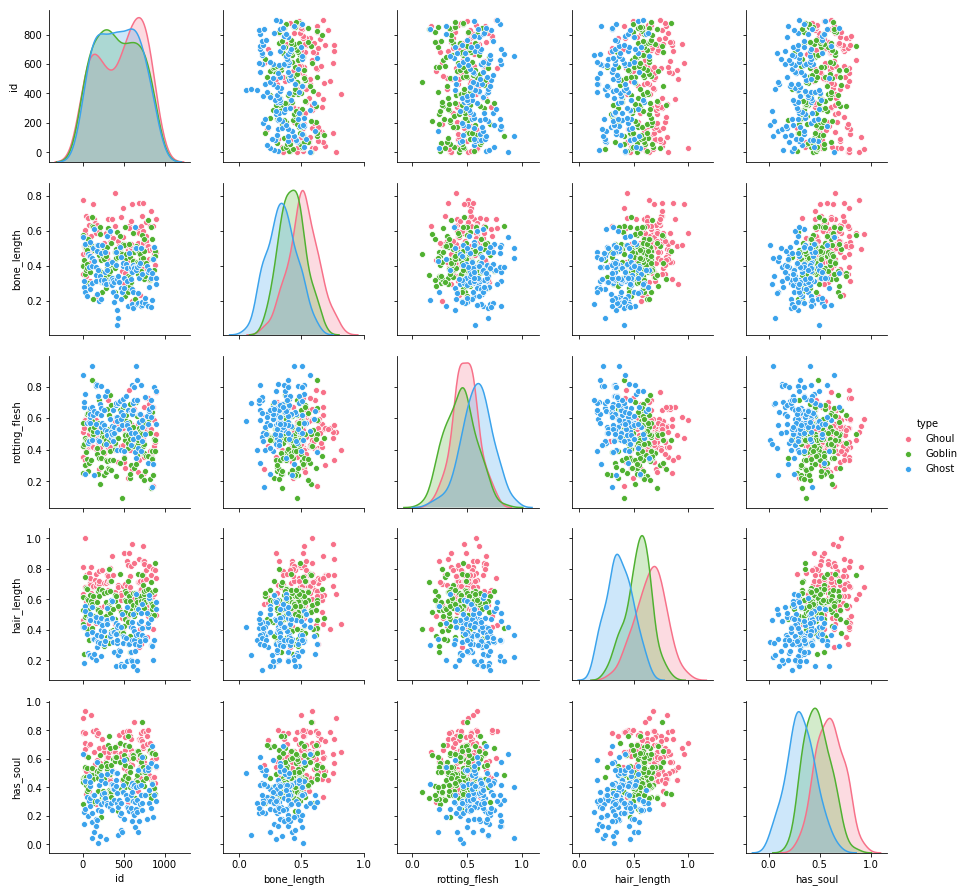

In [15]:
# 特徴量の散布図行列
sns.pairplot(data = train_set, hue='type', palette="husl")

# Section.5: データの前処理



In [0]:
# ダミー変数へ変換（訓練データ）
dummies = pd.get_dummies(train_set['color'], drop_first=True)
train_set = train_set.drop(columns='color')
train_set = pd.merge(train_set, dummies, left_index=True, right_index=True)

# ダミー変数へ変換（テストデータ）
dummies2 = pd.get_dummies(test_set['color'], drop_first=True)
test_set = test_set.drop(columns='color')
test_set = pd.merge(test_set, dummies2, left_index=True, right_index=True)

In [17]:
# 訓練データのID0のレコードを表示
train_set[train_set['id'] == 0]

,id,bone_length,rotting_flesh,hair_length,has_soul,type,blood,blue,clear,green,white
0,0,0.354512,0.350839,0.465761,0.781142,Ghoul,0,0,1,0,0


In [18]:
# 訓練データのID2のレコードを表示
train_set[train_set['id'] == 2]

,id,bone_length,rotting_flesh,hair_length,has_soul,type,blood,blue,clear,green,white
2,2,0.467875,0.35433,0.811616,0.791225,Ghoul,0,0,0,0,0


In [0]:
# 訓練データの特徴量とターゲットの分割
X_train = train_set.drop('type',axis=1)
y_train = train_set['type'].copy()

In [0]:
# Scikit-learnのStandarScaler（）を利用
StandardScaler = StandardScaler()

# 訓練データの特徴量の正規化
X_train = StandardScaler.fit_transform(X_train)

# テストデータの特徴量の正規化
test_set = StandardScaler.fit_transform(test_set)

# Section.6: モデル訓練

In [21]:
# サポートベクタークラシファイヤーの構築
clf = svm.SVC()

# 訓練データの学習
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Section.7: モデルを使って予測（訓練データ）


In [0]:
# 訓練データを使って予測
train_y_pred = clf.predict(X_train)

In [23]:
# 訓練データの予測結果を混同行列で評価
confusion_matrix(y_train,train_y_pred, labels=["Ghost", "Ghoul", "Goblin"])

array([[106,   0,  11],
       [  2,  99,  28],
       [ 11,  24,  90]])

In [24]:
# 訓練データの正解率を算出
accuracy_score(y_train,train_y_pred)

0.7951482479784366

# Section.8: テストデータで予測して Kaggle へ投稿

投稿形式のフォーマットのサンプルが提供されており、
それにしたがって、投稿する必要がある。

In [25]:
# 投稿フォーマットのサンプルファイル
sample_set.head()

,id,type
0,3,Ghost
1,6,Ghost
2,9,Ghost
3,10,Ghost
4,13,Ghost


In [26]:
# テストデータでの予測
test_y_pred = clf.predict(test_set)

# 予測結果の最初の5レコードを表示
test_y_pred[0:5]

array(['Ghoul', 'Goblin', 'Ghoul', 'Ghost', 'Ghost'], dtype=object)

In [0]:
# テストセットの予測結果とIDをデータフレーム型に変更
my_solution = pd.DataFrame(test_y_pred, MonsterID, columns = ['type'])

# CSVファイルとして書き出し
my_solution.to_csv('int_submit.csv', index_label = ['id'])

In [0]:
# Google Colabからint_submit.csvをダウンロード
from google.colab import files
files.download("int_submit.csv")

# Section.9: GridSearchCV でハイパーパラメタチューニング

ハイパーパラメタチューニングとは、
ハイパーパラメタの値を調整することで、
予測精度を改善する工程を指す。



# Grid Search とは？

Grid Search は、様々なパラメタの値の組み合わせを使って、
モデルを何度も何度も構築し、最適なパラメタの値を算出する方法のこと。

Grid Search は SVM に限らず、多くの手法で利用できる。



In [0]:
# 新たにSVMモデルを構築
clf_2 = svm.SVC()

In [0]:
# グリッドサーチで検証するSVMのハイパーパラメータの設定
param_grid = [{'C': [0.001, 0.01, 0.1, 1, 10],
               'gamma': [.0001, .001, .01,.1,.2,.5,1,10],
               'kernel':['poly']},
              {'C': [.001,.01,.1,1, 10, 100, 1000],
               'gamma': [.0001, .001, .01,.1,.2,.5,1,10],
               'kernel': ['linear']},
              {'C': [.001,.01,.1,1, 10, 100, 1000],
               'gamma': [.0001, .001, .01,.1,.2,.5,1,10],
               'kernel': ['rbf']}
             ]

In [0]:
# グリッドサーチの構築
grid_searchlog = GridSearchCV(clf_2, param_grid, cv=5, scoring='accuracy')

In [32]:
# グリッドサーチの実行
grid_searchlog.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 10],
                          'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 10],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 10],
                

In [33]:
# 最適なハイパーパラメータの値を確認
grid_searchlog.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}

In [34]:
# グリッドサーチで算出した最適なハイパーパラメータの値
optimised_svm = grid_searchlog.best_estimator_
optimised_svm

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# 最適化されたSVMモデルと訓練データの予測
train_y_pred_opt = optimised_svm.predict(X_train)

In [36]:
# 訓練データの正解率（ハイパーパラメータチューニング実施後）
accuracy_score(y_train,train_y_pred_opt)

0.7789757412398922

# Section.10: 最適化したSVMモデルの予測評価

In [0]:
# 最適化されたSVMモデルとテストデータの予測
test_y_pred_opt = optimised_svm.predict(test_set)

In [0]:
# テストセットの予測結果とIDをデータフレーム型に変更
my_solution_opt = pd.DataFrame(test_y_pred_opt, MonsterID, columns = ['type'])

# CSVファイルとして書き出し
my_solution_opt.to_csv('2nd_submit.csv', index_label = ['id'])

In [0]:
# Google Colabからint_submit.csvをダウンロード
from google.colab import files
files.download("2nd_submit.csv")